In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers


In [43]:
from tensorflow.keras.datasets import cifar10

# Loading CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(df.head())
print(df.shape)

     0    1    2    3    4    5    6    7    8    9  ...  3063  3064  3065  \
0   59   62   63   43   46   45   50   48   43   68  ...   216   184   140   
1  154  177  187  126  137  136  105  104   95  102  ...   143   133   139   
2  255  255  255  253  253  253  253  253  253  253  ...    78    85    83   
3   28   25   10   37   34   19   38   35   20   42  ...    54    47    28   
4  170  180  198  168  178  196  177  185  203  183  ...    75    79    82   

   3066  3067  3068  3069  3070  3071  label  
0   151   118    84   123    92    72      6  
1   143   134   142   143   133   144      9  
2    79    85    83    80    86    84      9  
3    63    56    37    72    65    46      4  
4    71    75    78    73    77    80      1  

[5 rows x 3073 columns]
(60000, 3073)


In [ ]:
# Convert images to flattened vectors 
#X_flat = X.reshape(len(X), -1)  # shape: (60000, 32*32*3)

#why flatten: CIFAR-10 images are 32×32 pixels with 3 color channels - shape (32,32,3)
#flattening converts each image into a 1D vector of length 32*32*3 = 3072
#so instead of a 3D array per image, you have a single row of numbers representing all pixel values

In [44]:
#Features and labels
X = df.iloc[:, :-1].values.astype('float32') / 255.0  # normalize
y = df['label'].values


In [45]:
# Split into train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [46]:
# Flatten labels (just in case)
y_train = y_train.flatten()
y_test = y_test.flatten()

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (48000, 3072)
X_test shape: (12000, 3072)


In [47]:
# CIFAR-10 class names
classes = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]


In [ ]:

# layer sizes and activation functions
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(3072,)),  # 32*32*3 = 3072
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

model.summary()

/opt/miniconda3/envs/cifar_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
#configuring the learning process of the model, preparing basially
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #using integer labels
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3156 - loss: 1.8857 - val_accuracy: 0.3540 - val_loss: 1.7660
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3838 - loss: 1.7133 - val_accuracy: 0.3842 - val_loss: 1.6916
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4120 - loss: 1.6432 - val_accuracy: 0.4067 - val_loss: 1.6156
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4287 - loss: 1.5945 - val_accuracy: 0.4327 - val_loss: 1.5817
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4444 - loss: 1.5610 - val_accuracy: 0.4452 - val_loss: 1.5708
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4563 - loss: 1.5254 - val_accuracy: 0.4531 - val_loss: 1.5302
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4648 - loss: 1.5013 - val_accuracy: 0.4554 - val_loss: 1.5389
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4689 - loss: 1.4810 - val_accuracy: 0.

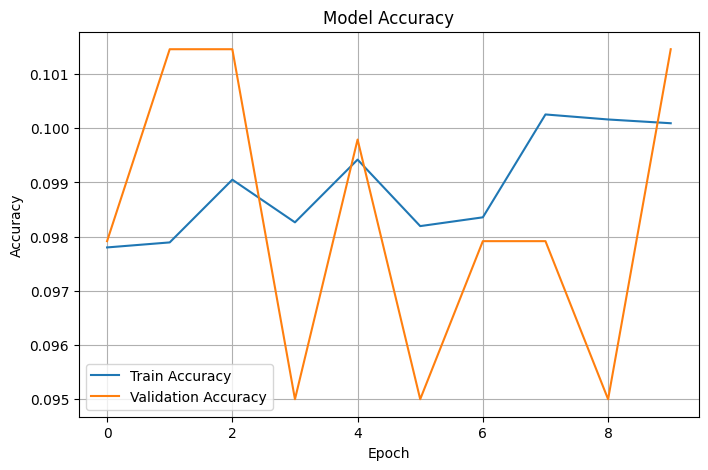

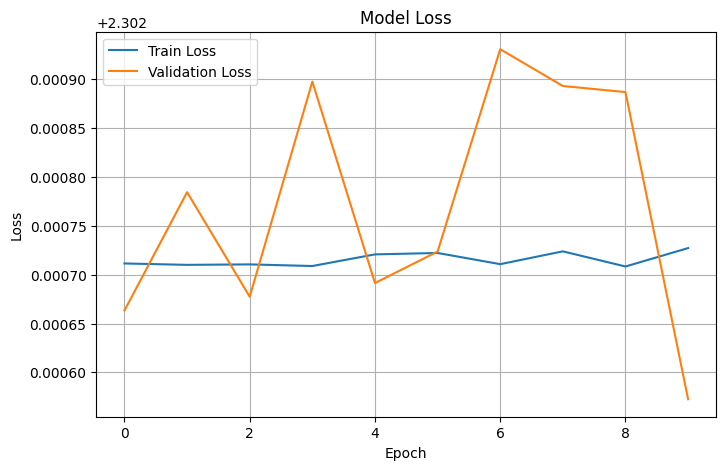

In [50]:
import matplotlib.pyplot as plt

# ---------------- Accuracy Plot ----------------
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

# ---------------- Loss Plot ----------------
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


In [51]:
#training model
history = model.fit(
    X_train, y_train, #trainign data
    validation_split=0.1, #fraction of training data to use for validation 
    epochs=10, #how many passes thru datatset
    batch_size=64 #how many samples per weight update
)

Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4899 - loss: 1.4332 - val_accuracy: 0.4652 - val_loss: 1.4816
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4968 - loss: 1.4198 - val_accuracy: 0.4604 - val_loss: 1.5065
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4972 - loss: 1.4097 - val_accuracy: 0.4858 - val_loss: 1.4390
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5008 - loss: 1.4011 - val_accuracy: 0.4790 - val_loss: 1.4765
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5052 - loss: 1.3888 - val_accuracy: 0.4815 - val_loss: 1.4485
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5102 - loss: 1.3773 - val_accuracy: 0.4877 - val_loss: 1.4429
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5146 - loss: 1.3674 - val_accuracy: 0.4863 - val_loss: 1.4213
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5178 - loss: 1.3555 - val_accuracy: 0.

In [52]:
#evaluating on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")



375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.4764 - loss: 1.5126
Test accuracy: 0.4764


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step


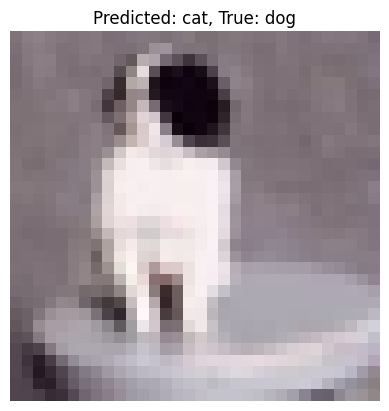

In [53]:
# Make predictions
predictions = model.predict(X_test)

# CIFAR-10 class names
classes = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Function to show a prediction
def show_prediction(index):
    img = (X_test[index].reshape(32, 32, 3) * 255).astype(np.uint8)
    plt.imshow(img)
    plt.title(f"Predicted: {classes[np.argmax(predictions[index])]}, True: {classes[y_test[index]]}")
    plt.axis('off')
    plt.show()

# Show first test image
show_prediction(0)


In [ ]:
model.save("cifar10_mlp_classifier.h5")
print("✅ Model saved as cifar10_mlp_classifier.h5")
